# CI width by changing sample size for QMC and IID Beta

Importing the modules:

In [16]:
import sys
import os

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.stats import beta
from scipy.stats import multinomial
import matplotlib.cm as cm

sys.path.append(os.path.relpath("../.."))
from confseq.cs_plots import ConfseqToPlot, DataGeneratingProcess, plot_CSs
from other_bounds import hoeffding_ci, maurer_pontil_empbern_ci
from confseq.predmix import predmix_empbern_ci_seq
from confseq.betting import betting_ci_seq

figures_location = os.path.relpath("figures/")

import random
import qmcpy as qp

%matplotlib inline

## IID vs QMC_IID (IID replications through spawning)

Plot for IID

Using 11 cores
Using 11 cores


/opt/miniconda3/envs/bet_sim/lib/python3.8/site-packages/numpy/core/fromnumeric.py:57
/opt/miniconda3/envs/bet_sim/lib/python3.8/site-packages/numpy/core/fromnumeric.py:57


Using 11 cores
Using 11 cores


/opt/miniconda3/envs/bet_sim/lib/python3.8/site-packages/numpy/core/fromnumeric.py:57
/opt/miniconda3/envs/bet_sim/lib/python3.8/site-packages/numpy/core/fromnumeric.py:57


Using 11 cores
Using 11 cores


/opt/miniconda3/envs/bet_sim/lib/python3.8/site-packages/numpy/core/fromnumeric.py:57
/opt/miniconda3/envs/bet_sim/lib/python3.8/site-packages/numpy/core/fromnumeric.py:57


Using 11 cores
Using 11 cores


/opt/miniconda3/envs/bet_sim/lib/python3.8/site-packages/numpy/core/fromnumeric.py:57
/opt/miniconda3/envs/bet_sim/lib/python3.8/site-packages/numpy/core/fromnumeric.py:57


Using 11 cores
Using 11 cores


/opt/miniconda3/envs/bet_sim/lib/python3.8/site-packages/numpy/core/fromnumeric.py:57


H-CI [H63] took an average of 0.000150299072265625 seconds
H-CI [H63] miscovered in 0 out of 5 experiments
EB-CI [MP09] took an average of 0.00015435218811035156 seconds
EB-CI [MP09] miscovered in 0 out of 5 experiments
PrPl-EB-CI [Rmk 1] took an average of 0.03622307777404785 seconds
PrPl-EB-CI [Rmk 1] miscovered in 0 out of 5 experiments
Hedged-CI [Rmk 3] took an average of 0.5423564434051513 seconds
Hedged-CI [Rmk 3] miscovered in 0 out of 5 experiments


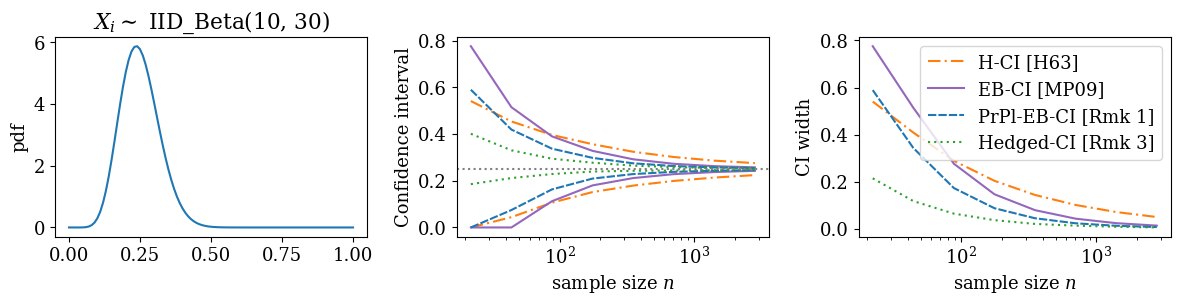

In [17]:
N = (2**8) * 11
alpha = 0.05
times = 11 * (2** np.arange(1,9))

cs_list = [
    ConfseqToPlot(
        lambda x: hoeffding_ci(x, times=times, alpha=alpha),
        "H-CI [H63]",
        "tab:orange",
        "-.",
    ),
    ConfseqToPlot(
        lambda x: maurer_pontil_empbern_ci(x, times=times, alpha=alpha),
        "EB-CI [MP09]",
        "tab:purple",
        "-",
    ),
    ConfseqToPlot(
        lambda x: predmix_empbern_ci_seq(
            x, times=times, truncation=1 / 2, alpha=alpha, parallel=True
        ),
        "PrPl-EB-CI [Rmk 1]",
        "tab:blue",
        "--",
    ),
    ConfseqToPlot(
        lambda x: betting_ci_seq(
            x, times=times, alpha=alpha, parallel=True, m_trunc=True, trunc_scale=3 / 4
        ),
        "Hedged-CI [Rmk 3]",
        "tab:green",
        ":",
  
    ),
]

dgp_list_iid = [

    DataGeneratingProcess(
        data_generator_fn=lambda: np.random.beta(10, 30, N),
        dist_fn=lambda x: beta.pdf(x, 10, 30),
        mean=1 / 4,
        name="Beta_10,_30_",
        discrete=False,
        title="$X_i \sim$ IID_Beta(10, 30)",
    ),
]

plot_CSs(
    dgp_list_iid,
    cs_list,
    times=times,
    time_uniform=False,
    display_start=1,
    nsim=5,
    log_scale=True,
    folder=figures_location,
);

Plot for QMC:

Using 11 cores


/Users/aaditjain/Simulations-on-the-betting-paper---QMC/simulations/Fixed-time/../../other_bounds.py:116


Using 11 cores
Using 11 cores


/Users/aaditjain/Simulations-on-the-betting-paper---QMC/simulations/Fixed-time/../../other_bounds.py:116


Using 11 cores
Using 11 cores


/Users/aaditjain/Simulations-on-the-betting-paper---QMC/simulations/Fixed-time/../../other_bounds.py:116


Using 11 cores
Using 11 cores


/Users/aaditjain/Simulations-on-the-betting-paper---QMC/simulations/Fixed-time/../../other_bounds.py:116


Using 11 cores
Using 11 cores


/Users/aaditjain/Simulations-on-the-betting-paper---QMC/simulations/Fixed-time/../../other_bounds.py:116


Using 11 cores
H-CI [H63] took an average of 2.703666687011719e-05 seconds
H-CI [H63] miscovered in 0 out of 5 experiments
EB-CI [MP09] took an average of 0.00012636184692382812 seconds
EB-CI [MP09] miscovered in 0 out of 5 experiments
PrPl-EB-CI [Rmk 1] took an average of 0.03243579864501953 seconds
PrPl-EB-CI [Rmk 1] miscovered in 0 out of 5 experiments
Hedged-CI [Rmk 3] took an average of 0.20505456924438475 seconds
Hedged-CI [Rmk 3] miscovered in 0 out of 5 experiments


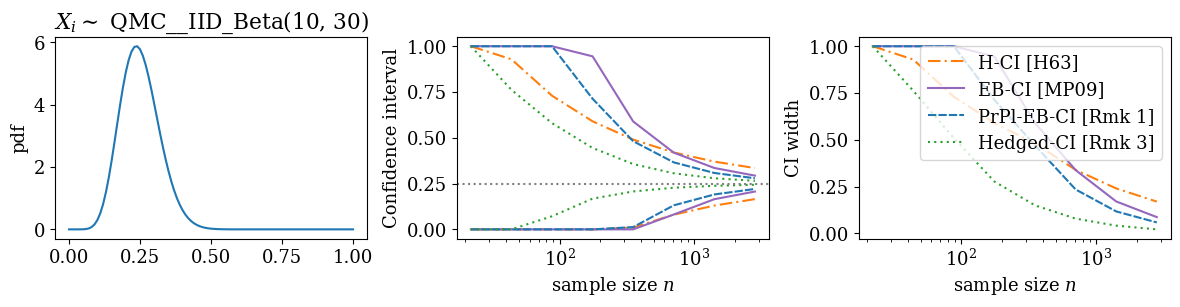

In [18]:
def gen_qmc_samples_iid(distribution = qp.SciPyWrapper(discrete_distrib=qp.DigitalNetB2(1,seed = 7),scipy_distribs=beta(a=10,b=30))
                         , spawn_samples = 11 ,gen_samples = 2**8):
    spw = distribution
    spws = spw.spawn(spawn_samples)
    samples = spws[0].gen_samples(gen_samples).flatten()
    for i in range (len(spws)- 1):
        curr_samples = spws[i + 1].gen_samples(gen_samples).flatten()
        samples = np.vstack((samples,curr_samples))
    return np.mean(samples, axis = 0)

spawn_samples = 11
gen_samples = 2**8
alpha = 0.05
times = 2** np.arange(1,9)

cs_list = [
    ConfseqToPlot(
        lambda x: hoeffding_ci(x, times=times, alpha=alpha),
        "H-CI [H63]",
        "tab:orange",
        "-.",
    ),
    ConfseqToPlot(
        lambda x: maurer_pontil_empbern_ci(x, times=times, alpha=alpha),
        "EB-CI [MP09]",
        "tab:purple",
        "-",
    ),
    ConfseqToPlot(
        lambda x: predmix_empbern_ci_seq(
            x, times=times, truncation=1 / 2, alpha=alpha, parallel=True
        ),
        "PrPl-EB-CI [Rmk 1]",
        "tab:blue",
        "--",
    ),
    ConfseqToPlot(
        lambda x: betting_ci_seq(
            x, times=times, alpha=alpha, parallel=True, m_trunc=True, trunc_scale=3 / 4
        ),
        "Hedged-CI [Rmk 3]",
        "tab:green",
        ":",
  
    ),
]

dgp_list_qmc = [

    DataGeneratingProcess(
        data_generator_fn=lambda: gen_qmc_samples_iid(),
        dist_fn=lambda x: beta.pdf(x, 10, 30),
        mean=1 / 4,
        name="QMC_Beta_10,_30_",
        discrete=False,
        title="$X_i \sim$ QMC__IID_Beta(10, 30)",
    ),
]

plot_CSs(
    dgp_list_qmc,
    cs_list,
    times=spawn_samples * times,
    time_uniform=False,
    display_start=1,
    nsim=5,
    log_scale=True,
    folder=figures_location,
);

## IID vs QMC (no spawning)

Using 11 cores


/Users/aaditjain/Simulations-on-the-betting-paper---QMC/simulations/Fixed-time/../../other_bounds.py:116


Using 11 cores
H-CI [H63] took an average of 0.00011706352233886719 seconds
H-CI [H63] miscovered in 0 out of 1 experiments
EB-CI [MP09] took an average of 0.00022411346435546875 seconds
EB-CI [MP09] miscovered in 0 out of 1 experiments
PrPl-EB-CI [Rmk 1] took an average of 0.040257930755615234 seconds
PrPl-EB-CI [Rmk 1] miscovered in 0 out of 1 experiments
Hedged-CI [Rmk 3] took an average of 0.2128739356994629 seconds
Hedged-CI [Rmk 3] miscovered in 0 out of 1 experiments
Using 11 cores


/Users/aaditjain/Simulations-on-the-betting-paper---QMC/simulations/Fixed-time/../../other_bounds.py:116


Using 11 cores
H-CI [H63] took an average of 2.09808349609375e-05 seconds
H-CI [H63] miscovered in 0 out of 1 experiments
EB-CI [MP09] took an average of 7.772445678710938e-05 seconds
EB-CI [MP09] miscovered in 0 out of 1 experiments
PrPl-EB-CI [Rmk 1] took an average of 0.031439781188964844 seconds
PrPl-EB-CI [Rmk 1] miscovered in 0 out of 1 experiments
Hedged-CI [Rmk 3] took an average of 0.1965181827545166 seconds
Hedged-CI [Rmk 3] miscovered in 0 out of 1 experiments


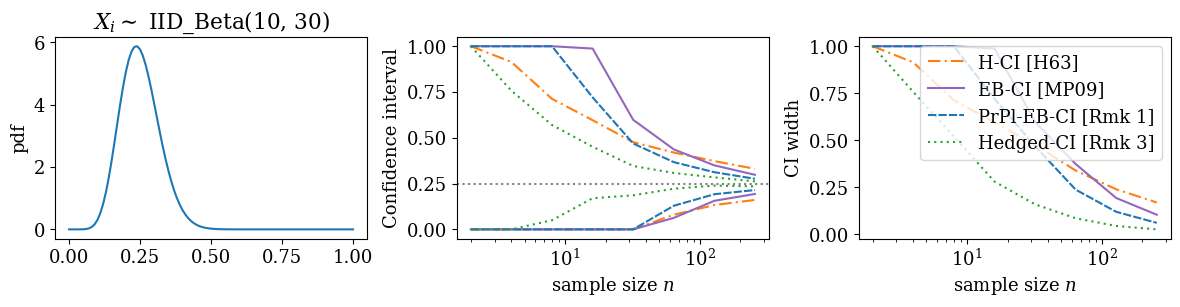

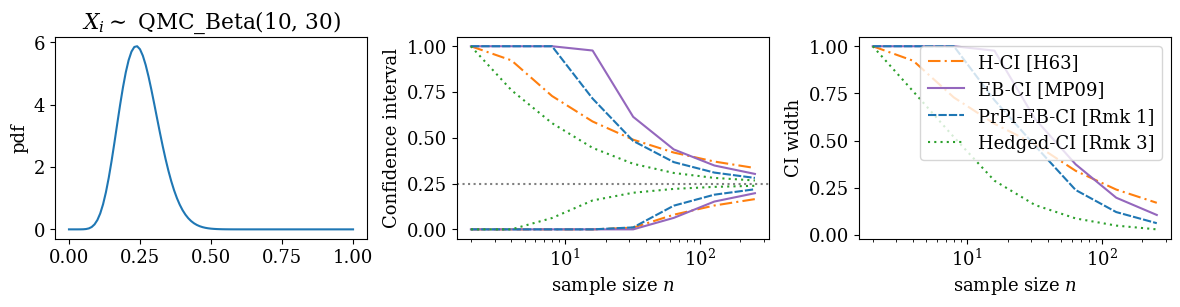

In [19]:
N = 2**8
alpha = 0.05
times = (2** np.arange(1,9))

cs_list = [
    ConfseqToPlot(
        lambda x: hoeffding_ci(x, times=times, alpha=alpha),
        "H-CI [H63]",
        "tab:orange",
        "-.",
    ),
    ConfseqToPlot(
        lambda x:maurer_pontil_empbern_ci (x, times=times, alpha=alpha),
        "EB-CI [MP09]",
        "tab:purple",
        "-",
    ),
    ConfseqToPlot(
        lambda x: predmix_empbern_ci_seq(
            x, times=times, truncation=1 / 2, alpha=alpha, parallel=True
        ),
        "PrPl-EB-CI [Rmk 1]",
        "tab:blue",
        "--",
    ),
    ConfseqToPlot(
        lambda x: betting_ci_seq(
            x, times=times, alpha=alpha, parallel=True, m_trunc=True, trunc_scale=3 / 4
        ),
        "Hedged-CI [Rmk 3]",
        "tab:green",
        ":",
  
    ),
]

dgp_list_iid = [

    DataGeneratingProcess(
        data_generator_fn=lambda: np.random.beta(10, 30, N),
        dist_fn=lambda x: beta.pdf(x, 10, 30),
        mean=1 / 4,
        name="Beta_10,_30_",
        discrete=False,
        title="$X_i \sim$ IID_Beta(10, 30)",
    ),
    DataGeneratingProcess(
        data_generator_fn= lambda: (qp.SciPyWrapper(discrete_distrib=qp.DigitalNetB2(1),scipy_distribs=beta(a=10,b=30)).gen_samples(N)).flatten(),
        dist_fn=lambda x: beta.pdf(x, 10, 30),
        mean=1 / 4,
        name="Beta_10,_30_",
        discrete=False,
        title="$X_i \sim$ QMC_Beta(10, 30)",
    ),
]

plot_CSs(
    dgp_list_iid,
    cs_list,
    times=times,
    time_uniform=False,
    display_start=1,
    nsim=1,
    log_scale=True,
    folder=figures_location,
);

Difference in CI width between IID and QMC

In [20]:
# Parameters
N = 2**8
alpha = 0.05
times = 2**np.arange(1, 9)
nsim = 5

# Generate data
x_1 = qp.SciPyWrapper(discrete_distrib=qp.DigitalNetB2(1), scipy_distribs=beta(a=10, b=30)).gen_samples(N).flatten()
x_2 = np.random.beta(10, 30, N)

# List of methods to compare
methods = [
    ("hoeffding_ci", hoeffding_ci),
    ("maurer_pontil_empbern_ci", maurer_pontil_empbern_ci),
    ("predmix_empbern_ci_seq", predmix_empbern_ci_seq),
    ("betting_ci_seq", betting_ci_seq),
]

# Function to compute and print confidence intervals
def compute_ci(method_name, method_func, x_1, x_2, times, alpha, nsim):
    print(f"{method_name} qmc vs iid\n")
    
    l_1 = np.zeros((nsim, len(times)))
    u_1 = np.zeros((nsim, len(times)))
    l_2 = np.zeros((nsim, len(times)))
    u_2 = np.zeros((nsim, len(times)))
    
    for i in range(nsim):
        l_1[i, :], u_1[i, :] = method_func(x_1, times=times, alpha=alpha)
        l_2[i, :], u_2[i, :] = method_func(x_2, times=times, alpha=alpha)

    #print(l_1.mean(axis=0))
    #print(l_2.mean(axis=0))
    #print(u_1.mean(axis=0))
    #print(u_2.mean(axis=0))
    print(u_2.mean(axis=0) - l_2.mean(axis=0) - (u_1.mean(axis=0) - l_1.mean(axis=0)))
    print("")

# Loop through methods
for method_name, method_func in methods:
    compute_ci(method_name, method_func, x_1, x_2, times, alpha, nsim)



hoeffding_ci qmc vs iid

[ 0.00000000e+00 -4.35242208e-02 -6.67828423e-02 -2.94383724e-02
  0.00000000e+00 -1.11022302e-16 -5.55111512e-17  0.00000000e+00]

maurer_pontil_empbern_ci qmc vs iid

[ 0.          0.          0.         -0.03721889 -0.00902844  0.00460767
  0.00063046 -0.00080349]

predmix_empbern_ci_seq qmc vs iid

[ 0.          0.          0.         -0.03088106 -0.00084506  0.00011366
 -0.00016547 -0.00032427]

betting_ci_seq qmc vs iid



/Users/aaditjain/Simulations-on-the-betting-paper---QMC/simulations/Fixed-time/../../other_bounds.py:116


[ 0.    -0.028  0.015  0.001  0.    -0.001  0.     0.   ]

